# Linear Regression

## Load Dependent Packages

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Select Hyper Parameters

In [2]:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

## Input Dataset and Pretreat

In [3]:
X_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Linear Regression Model

In [4]:
model = torch.nn.Linear(input_size, output_size)

## Loss and Optimizer

In [5]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Train Model with CPU

In [6]:
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors.
    inputs = torch.from_numpy(X_train)
    targets = torch.from_numpy(y_train)
    
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 4.7176
Epoch [10/60], Loss: 2.1193
Epoch [15/60], Loss: 1.0664
Epoch [20/60], Loss: 0.6395
Epoch [25/60], Loss: 0.4663
Epoch [30/60], Loss: 0.3959
Epoch [35/60], Loss: 0.3671
Epoch [40/60], Loss: 0.3552
Epoch [45/60], Loss: 0.3500
Epoch [50/60], Loss: 0.3477
Epoch [55/60], Loss: 0.3465
Epoch [60/60], Loss: 0.3457


## Plot Image with Origin and Predicted

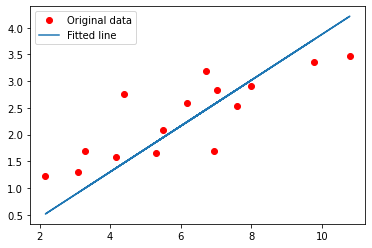

In [7]:
predicted = model(torch.from_numpy(X_train)).detach().numpy()
plt.plot(X_train, y_train, 'ro', label='Original data')
plt.plot(X_train, predicted, label='Fitted line')
plt.legend()
plt.show()

## Save the Model Checkpoint.

In [8]:
torch.save(model.state_dict(), 'linear_regression.ckpt')